In [ ]:
pip install tensorflow

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [16]:
X_train_full.shape

(50000, 32, 32, 3)

In [17]:
X_test.shape

(10000, 32, 32, 3)

#### Data normalization

In [18]:
X_val = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_val = y_train_full[:5000]
y_train = y_train_full[5000:]
X_test = X_test / 255

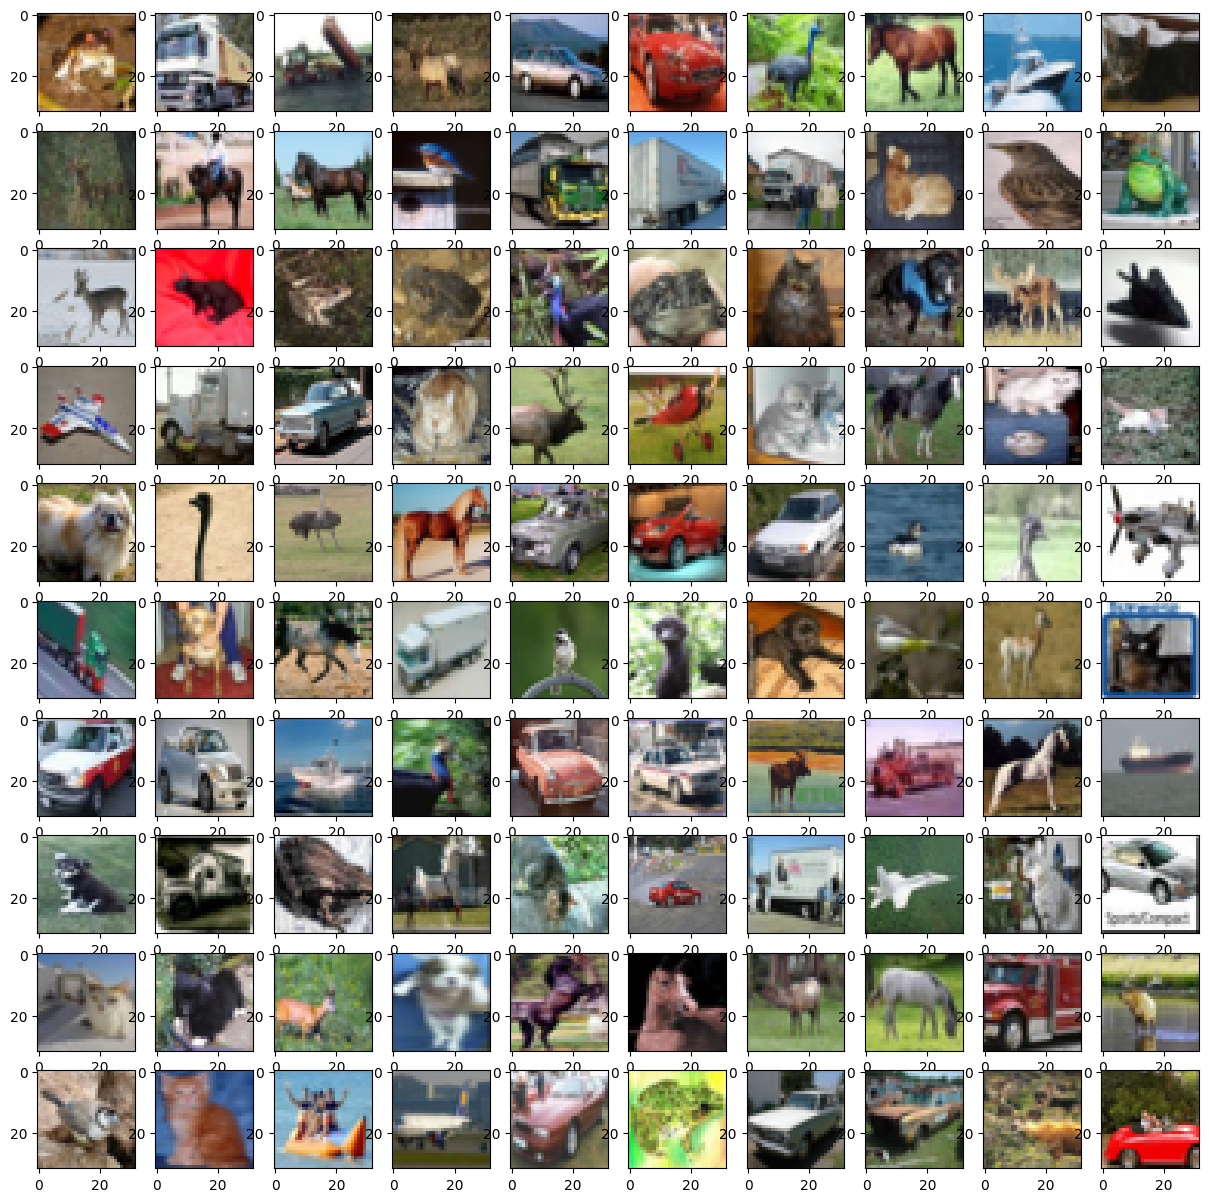

In [7]:
fig, axes = plt.subplots(10,10,figsize=(15,15))
a=0
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X_train_full[a])
        a+=1
plt.show()

#### Model 1 with early stopping

In [8]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=5, activation='tanh', kernel_size=(3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=8, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=10, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         368       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 10)          730       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 10)          0

In [10]:
model_1.layers

In [11]:
model_1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5)

In [13]:
history_1 = model_1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=early_stopping)

Epoch 1/20


1407/1407 [==============================] - 21s 13ms/step - loss: 1.8409 - accuracy: 0.3374 - val_loss: 2.4050 - val_accuracy: 0.2322
Epoch 2/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5816 - accuracy: 0.4271 - val_loss: 2.9794 - val_accuracy: 0.2104
Epoch 3/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5004 - accuracy: 0.4588 - val_loss: 1.9162 - val_accuracy: 0.3360
Epoch 4/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4433 - accuracy: 0.4820 - val_loss: 2.1668 - val_accuracy: 0.2950
Epoch 5/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3953 - accuracy: 0.5009 - val_loss: 2.0397 - val_accuracy: 0.3204
Epoch 6/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3678 - accuracy: 0.5138 - val_loss: 1.4507 - val_accuracy: 0.4862
Epoch 7/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3410 - accuracy: 0.5226 - val_loss: 1.4047

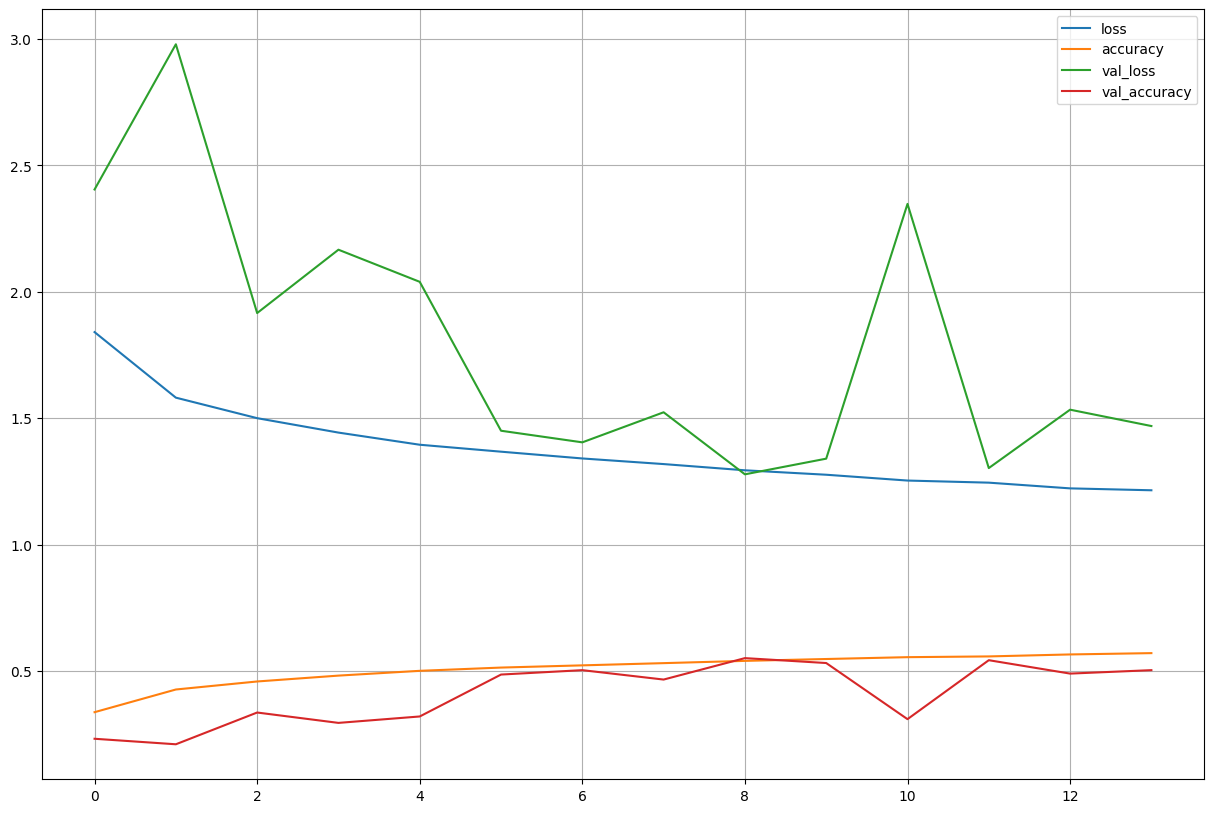

In [14]:
pd.DataFrame(history_1.history).plot(figsize=(15,10))
plt.grid()

In [15]:
test_loss, test_accuracy = model_1.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.4851 - accuracy: 0.4994
Test Loss: 1.4851059913635254
Test Accuracy: 0.49939998984336853


#### Model_2 with regularizers L1 & L2

In [16]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=4, activation='tanh', kernel_size=(3,3), input_shape=(32,32,3), batch_size=32),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='tanh', kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])  

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (32, 30, 30, 4)           112       
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 15, 15, 4)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (32, 900)                 0         
                                                                 
 dense_6 (Dense)             (32, 300)                 270300    
                                                                 
 batch_normalization_5 (Bat  (32, 300)                 1200      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (32, 100)                

In [18]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5)

In [20]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=early_stopping)

Epoch 1/20
1407/1407 [==============================] - 16s 10ms/step - loss: 4.1069 - accuracy: 0.3526 - val_loss: 6.1474 - val_accuracy: 0.1062
Epoch 2/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9539 - accuracy: 0.4200 - val_loss: 5.6847 - val_accuracy: 0.1808
Epoch 3/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8456 - accuracy: 0.4548 - val_loss: 9.9000 - val_accuracy: 0.1184
Epoch 4/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7624 - accuracy: 0.4719 - val_loss: 4.8410 - val_accuracy: 0.1544
Epoch 5/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6932 - accuracy: 0.4808 - val_loss: 3.6786 - val_accuracy: 0.2238
Epoch 6/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6640 - accuracy: 0.4866 - val_loss: 9.8811 - val_accuracy: 0.1386
Epoch 7/20
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6398 - accuracy: 0.4878 - val_loss: 2.9322 -

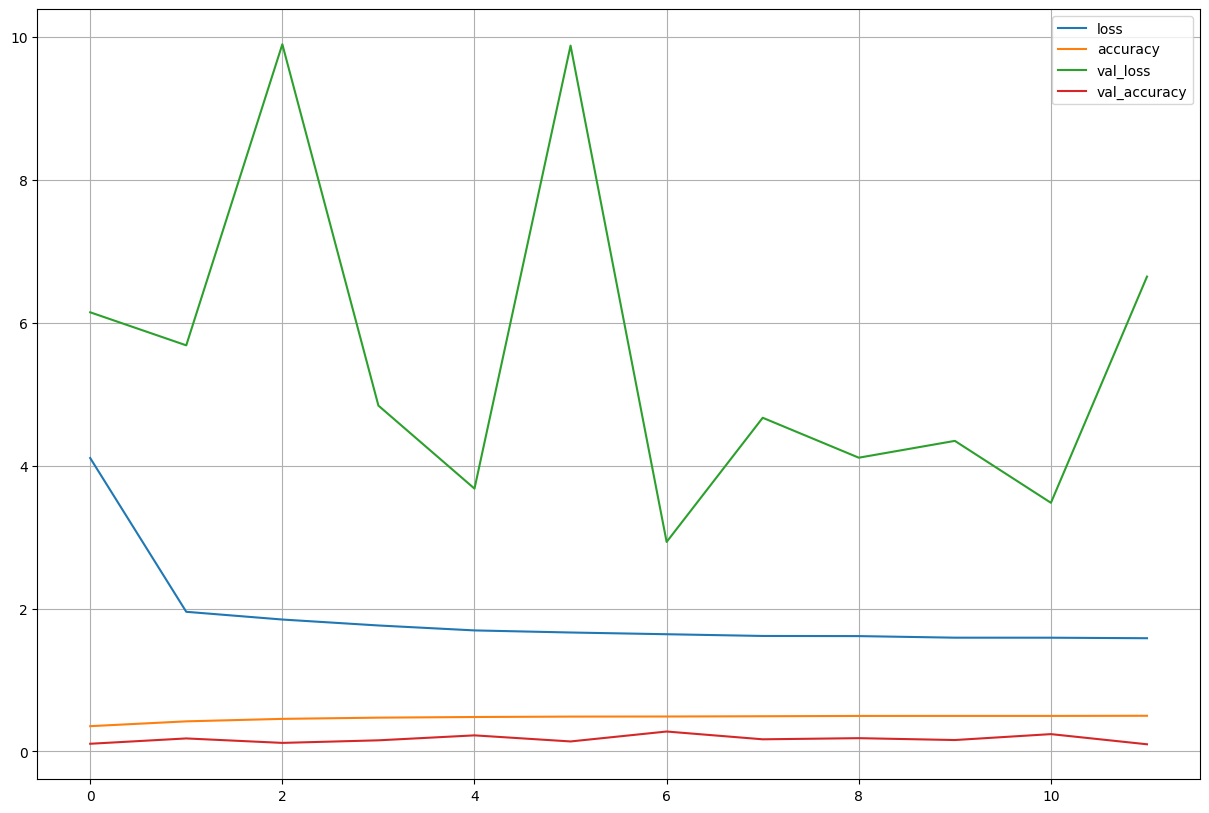

In [21]:
pd.DataFrame(history_2.history).plot(figsize=(15,10))
plt.grid()

In [ ]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

#### Model 3

In [43]:
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=5, activation='tanh', kernel_size=(3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=8, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=10, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [44]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 5)         140       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 5)         0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 8)         368       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 10)          730       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 10)         

In [45]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=early_stopping)

Epoch 1/20
1407/1407 [==============================] - 24s 14ms/step - loss: 1.7849 - accuracy: 0.3559 - val_loss: 1.5426 - val_accuracy: 0.4476
Epoch 2/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5031 - accuracy: 0.4618 - val_loss: 1.4582 - val_accuracy: 0.4810
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4059 - accuracy: 0.5005 - val_loss: 1.4263 - val_accuracy: 0.4990
Epoch 4/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.3391 - accuracy: 0.5263 - val_loss: 1.3276 - val_accuracy: 0.5376
Epoch 5/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.2922 - accuracy: 0.5450 - val_loss: 1.2967 - val_accuracy: 0.5452
Epoch 6/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.2442 - accuracy: 0.5623 - val_loss: 1.3482 - val_accuracy: 0.5340
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.2076 - accuracy: 0.5729 - val_loss: 1.2211 -

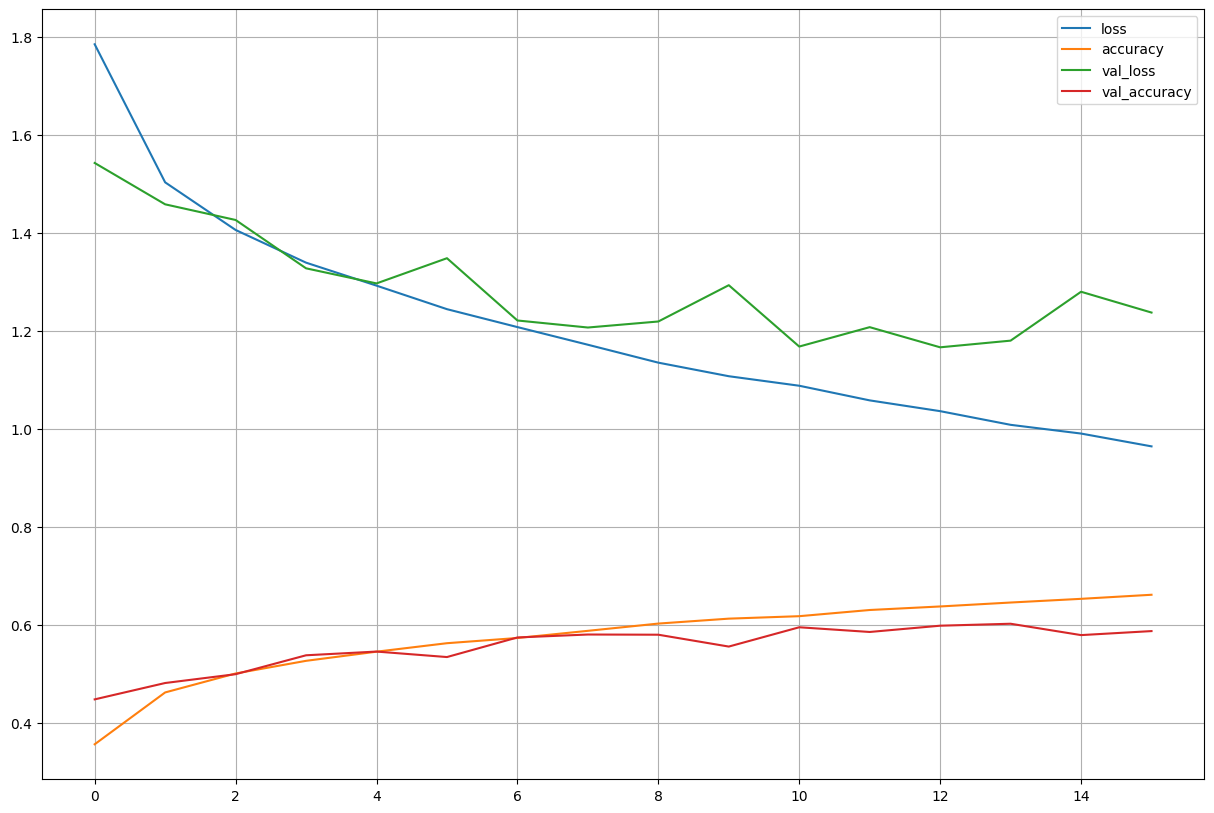

In [47]:
pd.DataFrame(history_3.history).plot(figsize=(15,10))
plt.grid()

In [48]:
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.2605 - accuracy: 0.5687
Test Loss: 1.2605328559875488
Test Accuracy: 0.5687000155448914


#### Model 4

In [49]:
model_4 = keras.models.Sequential([
    keras.layers.Conv2D(filters=5, activation='tanh', kernel_size=(3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=8, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=10, activation='tanh', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [50]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 5)         140       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 5)         0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 8)         368       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 10)          730       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 2, 2, 10)         

In [51]:
from keras.optimizers import Adam

In [52]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [53]:
model_4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
history_4 = model_4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 28s 17ms/step - loss: 1.7439 - accuracy: 0.3710 - val_loss: 1.7550 - val_accuracy: 0.3778
Epoch 2/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5119 - accuracy: 0.4569 - val_loss: 1.4088 - val_accuracy: 0.4952
Epoch 3/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4256 - accuracy: 0.4946 - val_loss: 1.4062 - val_accuracy: 0.4992
Epoch 4/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.3588 - accuracy: 0.5192 - val_loss: 1.5130 - val_accuracy: 0.4898
Epoch 5/10
1407/1407 [==============================] - 23s 17ms/step - loss: 1.3075 - accuracy: 0.5390 - val_loss: 1.3542 - val_accuracy: 0.5162
Epoch 6/10
1407/1407 [==============================] - 23s 17ms/step - loss: 1.2591 - accuracy: 0.5570 - val_loss: 1.3044 - val_accuracy: 0.5398
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 1.2283 - accuracy: 0.5646 - val_loss: 1.2598 -

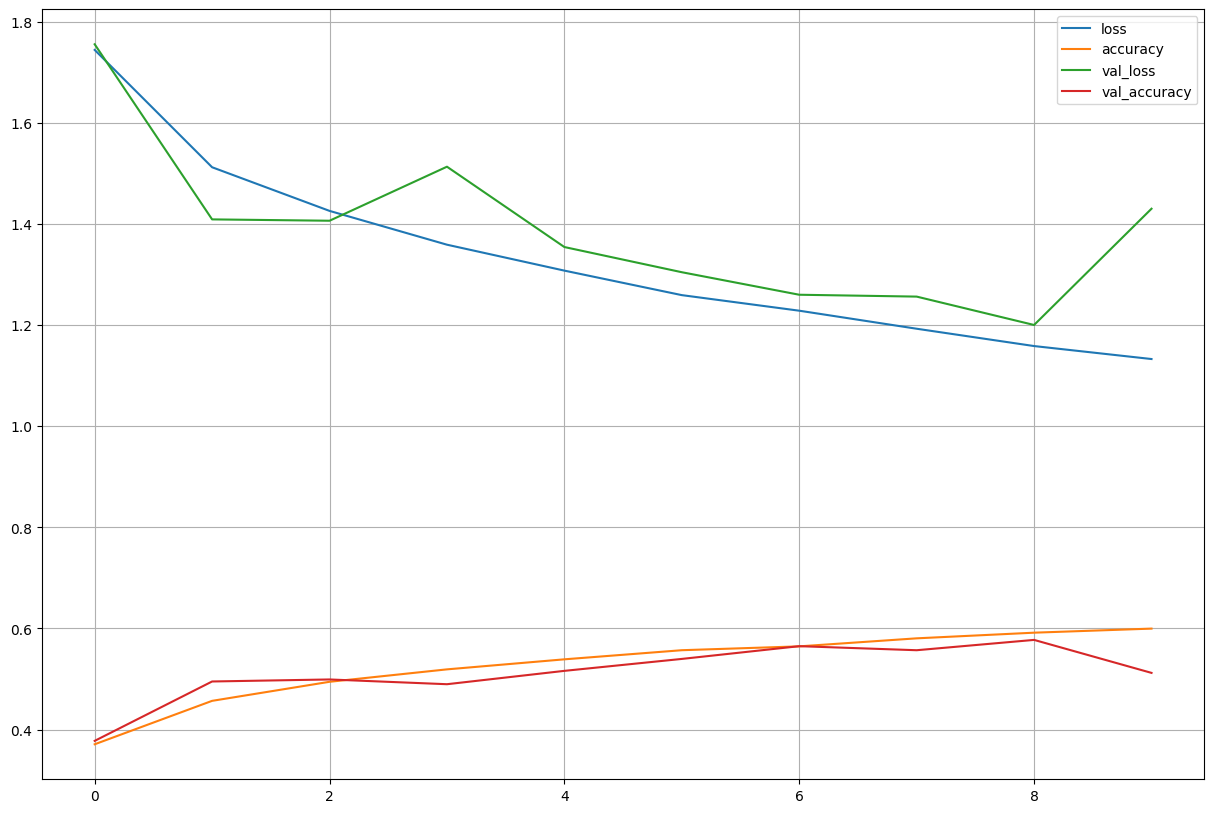

In [55]:
pd.DataFrame(history_4.history).plot(figsize=(15,10))
plt.grid()

In [56]:
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 1.4550 - accuracy: 0.5030
Test Loss: 1.4550487995147705
Test Accuracy: 0.503000020980835


#### Model 5

In [ ]:
pip install tensorflow keras

In [ ]:
pip install --upgrade tensorflow

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
def create_model_5():
    model_5 = keras.models.Sequential([
        keras.layers.Conv2D(filters=5, activation='tanh', kernel_size=(3,3), input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(filters=8, activation='tanh', kernel_size=(3,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(filters=10, activation='tanh', kernel_size=(3,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(400, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation='softmax')
    ])
    model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model_5

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=58)

In [12]:
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

In [24]:
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Mean accuracy: 0.5475333333015442
Standard deviation of accuracy: 0.0064307857765035815
